#Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

#Load the dataset

In [3]:
df= pd.read_csv('/content/Instagram-Reach.csv')

In [4]:
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


So here are two columns, one is the date and time column and other is the instagram reach in that respective date.

#So now let's convert the date and time column into date column.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


#Now we have the dataset in the proper format, and let's analyze the dataset to get the better result using different libraries and different charts such as line char, bar chart, boxplot etc.

#**Line Chart**

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'],
                         y=df['Instagram reach'],
                         mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date',
                  yaxis_title='Instagram Reach')
fig.show()

#**Bar chart**

In [9]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Date'],
                     y=df['Instagram reach'],
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day',
                  xaxis_title='Date',
                  yaxis_title='Instagram Reach')
fig.show()

#**Box Plot**

In [10]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['Instagram reach'],
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot',
                  yaxis_title='Instagram Reach')
fig.show()

#On hovering over these three graphs you can get the result on a particular day.

Now let’s create a day column and analyze reach based on the days of the week. To create a day column, we can use the dt.day_name() method to extract the day of the week from the Date column:

In [11]:
df['Day'] = df['Date'].dt.day_name()
print(df.head())

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


###Now let’s analyze the reach based on the days of the week. For this, we can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of the Instagram reach column for each day:

In [13]:
day_stats = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


#**Bar Chart**

In [14]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['mean'],
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['median'],
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['std'],
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week',
                  xaxis_title='Day',
                  yaxis_title='Instagram Reach')
fig.show()

#Forecasting using time series

In [17]:
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = df[["Date", "Instagram reach"]]

result = seasonal_decompose(df['Instagram reach'],
                            model='multiplicative',
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 640x480 with 0 Axes>

The reach is affected by seasonality, so we can use the SARIMA model to forecast the reach of the Instagram account. We need to find p, d, and q values to forecast the reach of Instagram. To find the value of d, we can use the autocorrelation plot, and to find the value of q, we can use a partial autocorrelation plot.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

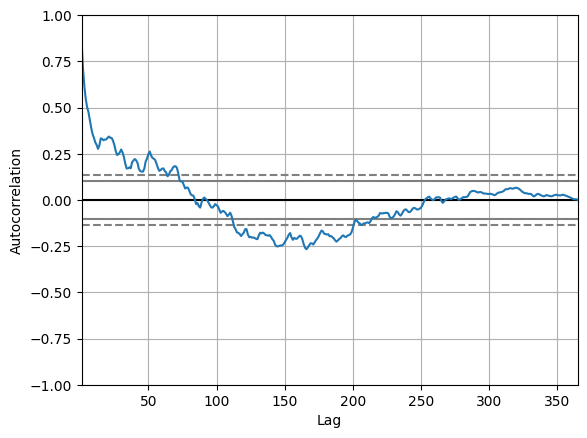

In [18]:
pd.plotting.autocorrelation_plot(df["Instagram reach"])

#Partial Autocorrelation

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



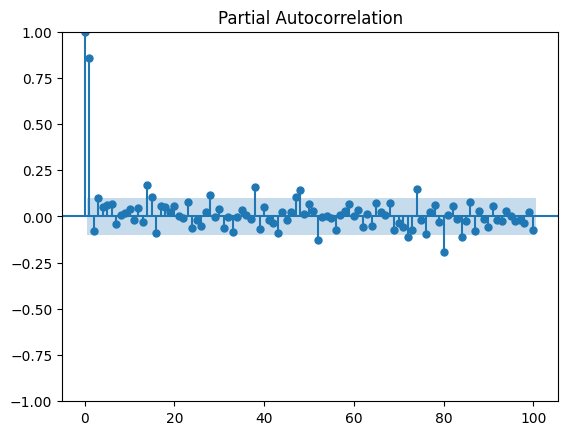

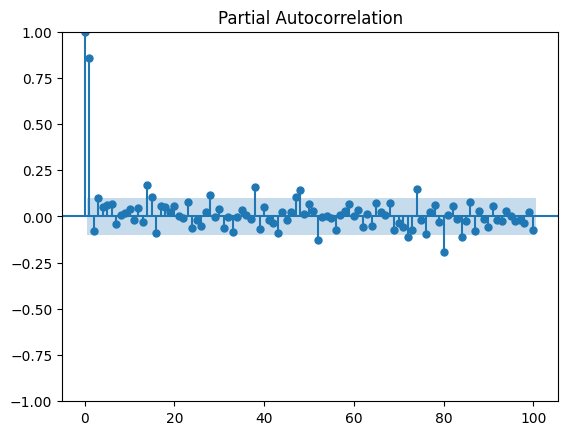

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Instagram reach"], lags = 100)

Now here’s how to train a model using SARIMA:

In [20]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.515
Date:                            Thu, 29 Jun 2023   AIC                           7919.031
Time:                                    04:41:49   BIC                           8000.167
Sample:                                         0   HQIC                          7951.319
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1913      6.555      0.029      0.977     -12.657      13.040
ar.L2          0.4707      6.092   

#Now let’s make predictions using the model and have a look at the forecasted reach:



In [21]:
predictions = model.predict(len(df), len(df)+100)

trace_train = go.Scatter(x=df.index,
                         y=df["Instagram reach"],
                         mode="lines",
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index,
                        y=predictions,
                        mode="lines",
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions",
                   xaxis_title="Date",
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()